### importing the data from Google Drive as i am using Google Colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping

file_path = '/content/drive/My Drive/Data_ADNIMerge_procssedNeuroImaging.csv'
data = pd.read_csv(file_path)

### Defining the target and feature columns

In [3]:
X = data.drop(columns=['AD_LABEL'])  # taking the 'AD_LABEL' as the target column
y = data['AD_LABEL']-1

### Preprocessing the data by handling the balancing with SMOTE and scaling with StandardScaler

In [4]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

### NOTE: The data has been verified for the presence of null values, duplicate rows which ALL don't exist

### Neural Network Declaration

In [5]:
def prs_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

### K-Fold Cross-Validation

In [6]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
personalized_risk_scores = np.zeros((len(y_resampled), 3))

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) # Early stopping to prevent overfitting

fold = 1
for train_index, test_index in kf.split(X_resampled):
    print(f"\nFold {fold}...")
    fold += 1

    X_train_full, X_test = X_resampled[train_index], X_resampled[test_index]
    y_train_full, y_test = y_resampled[train_index], y_resampled[test_index]

    X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

    model = prs_model(X_train.shape[1])

    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=50,
                        verbose=1,
                        callbacks=[early_stopping])

    y_prob = model.predict(X_test)
    personalized_risk_scores[test_index] = y_prob



Fold 1...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4352 - loss: 1.1603 - val_accuracy: 0.7486 - val_loss: 0.6023
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6520 - loss: 0.7445 - val_accuracy: 0.7886 - val_loss: 0.5005
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7797 - loss: 0.5503 - val_accuracy: 0.8286 - val_loss: 0.4378
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7823 - loss: 0.5351 - val_accuracy: 0.8343 - val_loss: 0.3963
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7958 - loss: 0.4958 - val_accuracy: 0.8514 - val_loss: 0.3695
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - loss: 0.4224 - val_accuracy: 0.8629 - val_loss: 0.3376
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.3568 - val_accuracy: 0.8743 - val_loss: 0.3049
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8659 - loss: 0.3464 - val_accuracy: 0.8914 - val_loss: 0.2914
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4412 - loss: 1.1293 - val_accuracy: 0.7429 - val_loss: 0.6519
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6398 - loss: 0.7453 - val_accuracy: 0.8114 - val_loss: 0.5323
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7134 - loss: 0.6491 - val_accuracy: 0.8286 - val_loss: 0.4784
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7796 - loss: 0.5322 - val_accuracy: 0.8457 - val_loss: 0.4321
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8346 - loss: 0.4260 - val_accuracy: 0.8514 - val_loss: 0.3767
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8257 - loss: 0.4173 - val_accuracy: 0.8857 - val_loss: 0.3327
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8648 - loss: 0.3833 - val_accuracy: 0.8857 - val_loss: 0.3068
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8571 - loss: 0.3275 - val_accuracy: 0.8914 - val_loss: 0.2805
Ep

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5228 - loss: 0.9189 - val_accuracy: 0.7314 - val_loss: 0.6162
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7278 - loss: 0.6307 - val_accuracy: 0.7829 - val_loss: 0.5224
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7661 - loss: 0.5421 - val_accuracy: 0.7771 - val_loss: 0.4733
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7899 - loss: 0.4882 - val_accuracy: 0.8229 - val_loss: 0.4133
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8234 - loss: 0.4052 - val_accuracy: 0.8229 - val_loss: 0.3639
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8324 - loss: 0.3960 - val_accuracy: 0.8457 - val_loss: 0.3309
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8859 - loss: 0.3064 - val_accuracy: 0.8686 - val_loss: 0.2991
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8754 - loss: 0.3088 - val_accuracy: 0.8571 - val_loss: 0.3008
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 

Fold 4...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4368 - loss: 1.1506 - val_accuracy: 0.6743 - val_loss: 0.7573
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6331 - loss: 0.8258 - val_accuracy: 0.7600 - val_loss: 0.6330
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7294 - loss: 0.6071 - val_accuracy: 0.7829 - val_loss: 0.5577
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8119 - loss: 0.5032 - val_accuracy: 0.7829 - val_loss: 0.5099
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8176 - loss: 0.4547 - val_accuracy: 0.8114 - val_loss: 0.4666
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8656 - loss: 0.3732 - val_accuracy: 0.8229 - val_loss: 0.4225
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8463 - loss: 0.3586 - val_accuracy: 0.8343 - val_loss: 0.4047
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8503 - loss: 0.3821 - val_accuracy: 0.8571 - val_loss: 0.3659
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Fold 5...
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5343 - loss: 0.9511 - val_accuracy: 0.7486 - val_loss: 0.6378
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6496 - loss: 0.7584 - val_accuracy: 0.8000 - val_loss: 0.5244
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7584 - loss: 0.5527 - val_accuracy: 0.8400 - val_loss: 0.4733
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7609 - loss: 0.5225 - val_accuracy: 0.8343 - val_loss: 0.4331
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.4414 - val_accuracy: 0.8457 - val_loss: 0.3961
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8286 - loss: 0.4481 - val_accuracy: 0.8514 - val_loss: 0.3723
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8465 - loss: 0.3978 - val_accuracy: 0.8857 - val_loss: 0.3498
Epoch 8/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8726 - loss: 0.3219 - val_accuracy: 0.8743 - val_loss: 0.3414
Ep

### Map Personalized Risk Scores to the Dataset

In [7]:
prs_df = pd.DataFrame(personalized_risk_scores, columns=['PRS_0', 'PRS_1', 'PRS_2'])
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['AD_LABEL'] = y_resampled
data_resampled = pd.concat([data_resampled, prs_df], axis=1)

### Function for Personalized Risk Score Mapping

In [8]:
def get_prs(actual_label, prs_0, prs_1, prs_2):
    if actual_label == 0:
        return prs_0
    elif actual_label == 1:
        return prs_1
    elif actual_label == 2:
        return prs_2
    else:
        return np.nan

data_resampled['PersonalizedRiskScore'] = data_resampled.apply(
    lambda row: get_prs(row['AD_LABEL'], row['PRS_0'], row['PRS_1'], row['PRS_2']), axis=1)

### Function to Assign a Personalized Risk Level

In [10]:
def assign_risk_level(prs):
    if prs < 0.4:
        return 'Low'
    elif prs < 0.7:
        return 'Moderate'
    else:
        return 'High'

data_resampled['Risk_Level'] = data_resampled['PersonalizedRiskScore'].apply(assign_risk_level)
data_resampled.drop(columns=['PRS_0', 'PRS_1', 'PRS_2'], inplace=True)
y_pred = np.argmax(personalized_risk_scores, axis=1)


In [ ]:
Model Evaluation - Classification Report, Confusion Matrix, and Learning Curves


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       363
           1       0.87      0.89      0.88       363
           2       0.95      0.96      0.96       363

    accuracy                           0.91      1089
   macro avg       0.91      0.91      0.91      1089
weighted avg       0.91      0.91      0.91      1089


Confusion Matrix:
[[323  35   5]
 [ 28 323  12]
 [  1  13 349]]


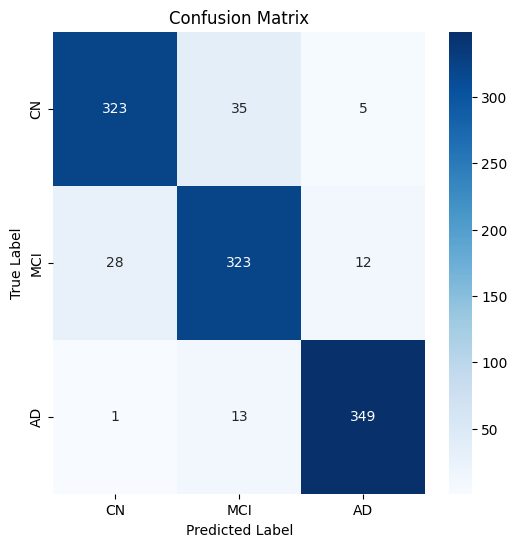

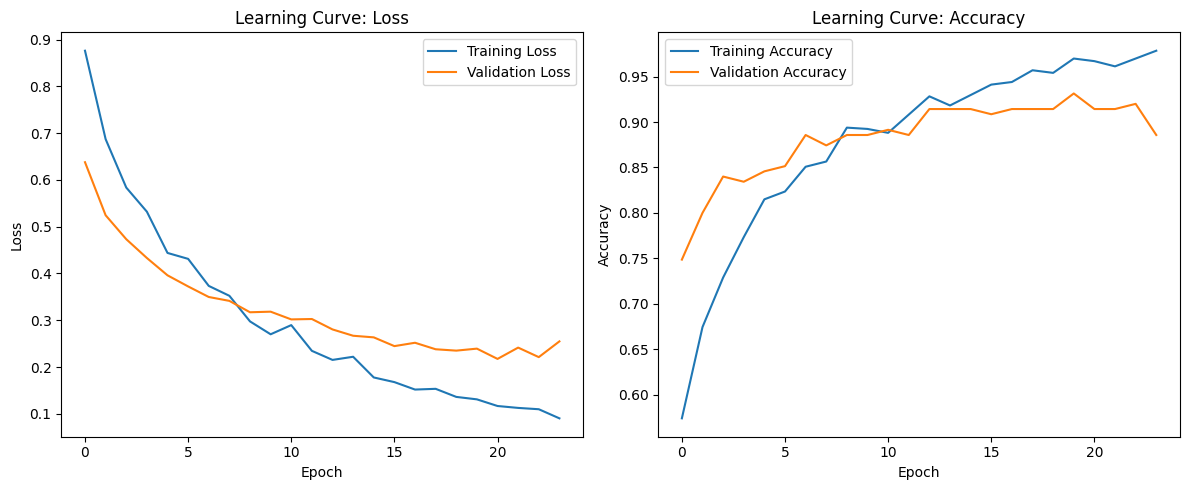

In [11]:
print("\nClassification Report:")
print(classification_report(y_resampled, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_resampled, y_pred)
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["CN", "MCI", "AD"], yticklabels=["CN", "MCI", "AD"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


plt.figure(figsize=(12,5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Learning Curve: Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Learning Curve: Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()
